<a href="https://colab.research.google.com/github/vartika2490/medical-insurance-cost-prediction/blob/main/medical_insurance_cost_prediction_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Upload the dataset
from google.colab import files
data = files.upload()


Saving insurance.csv to insurance.csv


In [2]:
df = pd.read_csv('insurance.csv')
print(df.head())
print("......data information.......")
print(df.info())
print(".......missing values.......")
print(df.isnull().sum())
print(".......statistical summary.......")
print(df.describe())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
......data information.......
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
.......missing values.......
age         0
sex         0
bmi 

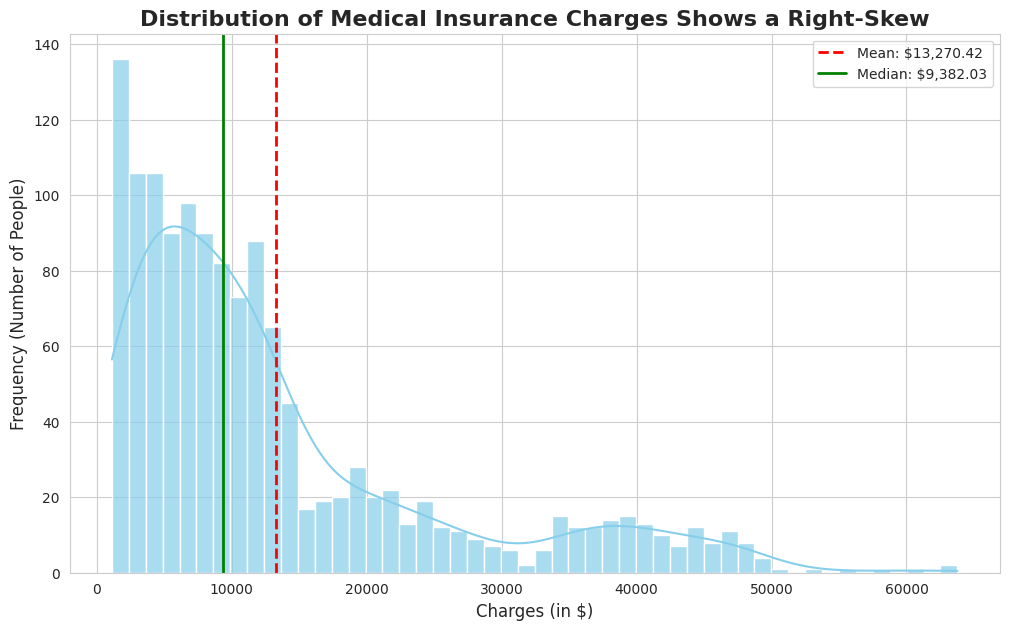

In [3]:
# DATA VISUALIZATION

sns.set_style("whitegrid")

#  Defining the size of figure on which histogram will plot
plt.figure(figsize=(12, 7))

# Plot the histogram
sns.histplot(data=df, x='charges', kde=True, color="skyblue", bins=50, alpha=0.7)

# Calculate the mean and median to add to the plot
mean_charge = df['charges'].mean()
median_charge = df['charges'].median()

# Add vertical lines to show the mean and median
plt.axvline(mean_charge, color='r', linestyle='--', linewidth=2, label=f'Mean: ${mean_charge:,.2f}')
plt.axvline(median_charge, color='g', linestyle='-', linewidth=2, label=f'Median: ${median_charge:,.2f}')

# adding labels and title
plt.title('Distribution of Medical Insurance Charges Shows a Right-Skew', fontsize=16, fontweight='bold')
plt.xlabel('Charges (in $)', fontsize=12)
plt.ylabel('Frequency (Number of People)', fontsize=12)
plt.legend()
plt.show()

/tmp/ipython-input-2294567734.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[0, 0], x='smoker', y='charges', data=df, palette='Blues')
/tmp/ipython-input-2294567734.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[1, 0], x='region', y='charges', data=df, palette='Purples')


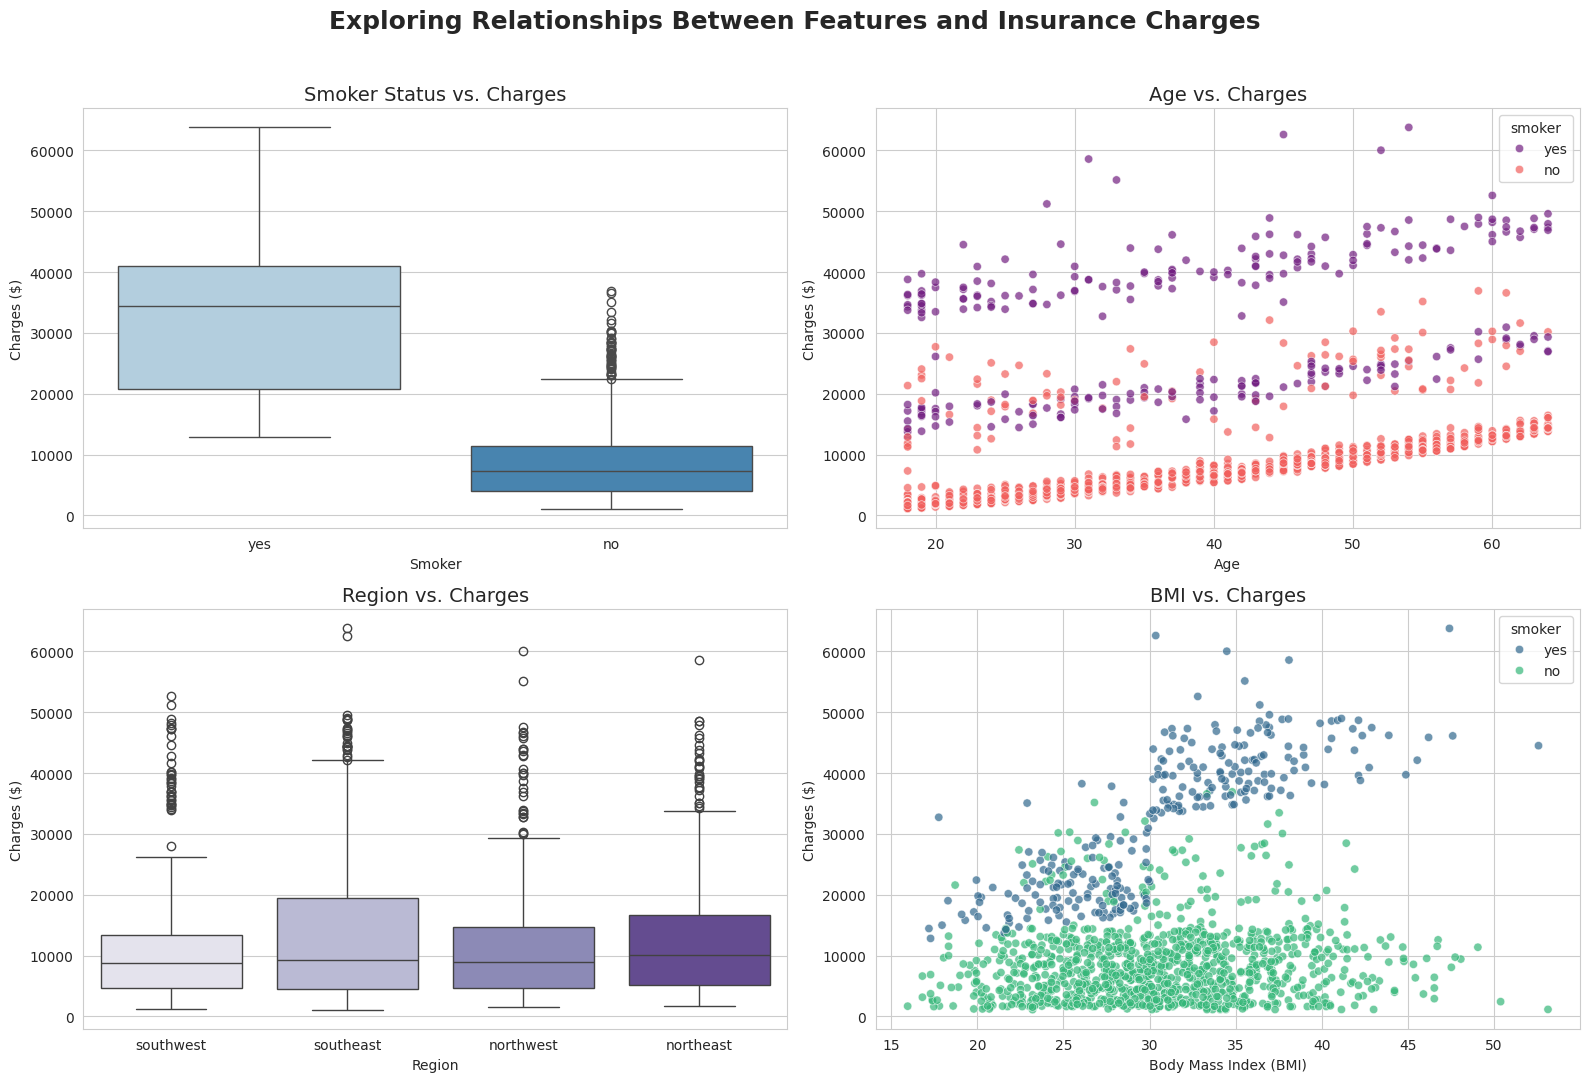

In [4]:

sns.set_style("whitegrid")

# Create a figure and a 2x2 grid of subplots (axes)
# This is a object-oriented way to handle multiple plots.

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 11))

# Add title for the entire figure
fig.suptitle('Exploring Relationships Between Features and Insurance Charges', fontsize=18, fontweight='bold')

# Subplot 1: Smoker vs Charges (Top-Left)
sns.boxplot(ax=axes[0, 0], x='smoker', y='charges', data=df, palette='Blues')
axes[0, 0].set_title('Smoker Status vs. Charges', fontsize=14)
axes[0, 0].set_xlabel('Smoker')
axes[0, 0].set_ylabel('Charges ($)')


# Subplot 2: Age vs Charges (Top-Right)
sns.scatterplot(ax=axes[0, 1], x='age', y='charges', data=df, hue='smoker', palette='magma', alpha=0.7)
axes[0, 1].set_title('Age vs. Charges', fontsize=14)
axes[0, 1].set_xlabel('Age')
axes[0, 1].set_ylabel('Charges ($)')


# Subplot 3: BMI vs Charges (Bottom-Left)
sns.scatterplot(ax=axes[1, 1], x='bmi', y='charges', data=df, hue='smoker', palette='viridis', alpha=0.7)
axes[1, 1].set_title('BMI vs. Charges', fontsize=14)
axes[1, 1].set_xlabel('Body Mass Index (BMI)')
axes[1, 1].set_ylabel('Charges ($)')


# Subplot 4: Region vs Charges (Bottom-Right)
sns.boxplot(ax=axes[1, 0], x='region', y='charges', data=df, palette='Purples')
axes[1, 0].set_title('Region vs. Charges', fontsize=14)
axes[1, 0].set_xlabel('Region')
axes[1, 0].set_ylabel('Charges ($)')


# Adjust layout to prevent titles and labels from overlapping
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [5]:
# Convert categorical columns into numerical format using one-hot encoding
df_processed = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

# Display the first few rows of the new, processed DataFrame
print(".........Processed Data (after One-Hot Encoding).........")
print(df_processed.head())

.........Processed Data (after One-Hot Encoding).........
   age     bmi  children      charges  sex_male  smoker_yes  region_northwest  \
0   19  27.900         0  16884.92400     False        True             False   
1   18  33.770         1   1725.55230      True       False             False   
2   28  33.000         3   4449.46200      True       False             False   
3   33  22.705         0  21984.47061      True       False              True   
4   32  28.880         0   3866.85520      True       False              True   

   region_southeast  region_southwest  
0             False              True  
1              True             False  
2              True             False  
3             False             False  
4             False             False  


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


# X contains all columns except (charges)
X = df_processed.drop('charges', axis=1)
# y contains only the (charges) column
y = df_processed['charges']

#  Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and Training the Linear Regression Model
model = LinearRegression()

# Training the model using thefi t() method on the training data
model.fit(X_train, y_train)

print("Model trained successfully")

Model trained successfully


......... Model Performance Metrics.........
R-squared (R²): 0.7836
Mean Absolute Error (MAE): $4,181.19
Root Mean Squared Error (RMSE): $5,796.28

.......... Model Coefficients...........
                   Coefficient
smoker_yes        23651.128856
children            425.278784
bmi                 337.092552
age                 256.975706
sex_male            -18.591692
region_northwest   -370.677326
region_southeast   -657.864297
region_southwest   -809.799354


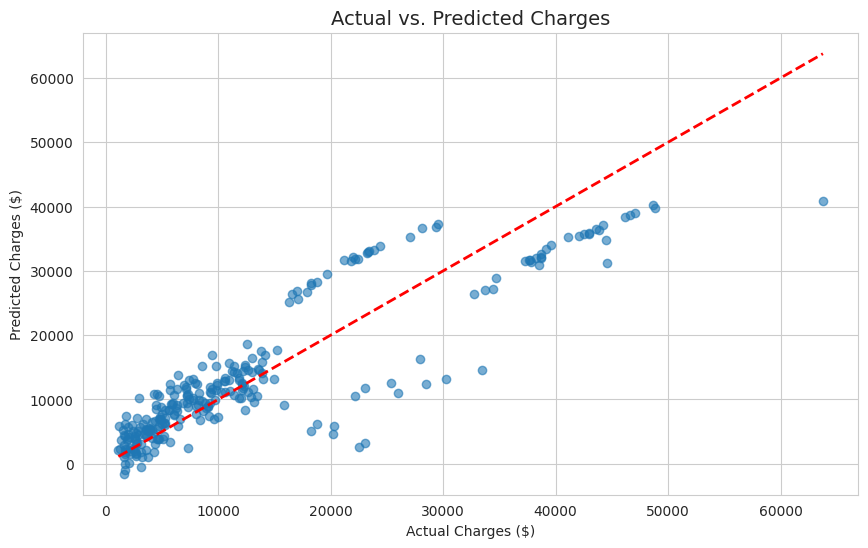

In [7]:
import numpy as np
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model's performance
print("......... Model Performance Metrics.........")

r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2:.4f}")

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): ${mae:,.2f}")

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): ${rmse:,.2f}")

# Create a DataFrame to view the coefficients with their corresponding feature names
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print()
print(".......... Model Coefficients...........")
print(coefficients.sort_values(by='Coefficient', ascending=False))

# 4. Visualize the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.title('Actual vs. Predicted Charges', fontsize=14)
plt.xlabel('Actual Charges ($)')
plt.ylabel('Predicted Charges ($)')
plt.show()